# Statistical Plotting Examples

This notebook demonstrates the statistical plotting functions in the neural_analysis package.
All functions use the **PlotGrid system** for consistent, flexible multi-panel visualizations.

## Functions Covered:
1. `plot_bar()` - Bar plots for group comparisons
2. `plot_violin()` - Enhanced violin plots with box plots and individual points
3. `plot_box()` - Box plots for distribution summaries
4. `plot_grouped_distributions()` - Multi-group comparisons
5. `plot_comparison_distributions()` - Side-by-side distribution grids

**Key Point**: All plotting in neural_analysis should use PlotGrid for consistency!

In [1]:
# Import packages
import sys
import numpy as np
import matplotlib.pyplot as plt

# Force fresh import by removing cached modules
modules_to_remove = [key for key in sys.modules.keys() if key.startswith('neural_analysis')]
for module in modules_to_remove:
    del sys.modules[module]

from neural_analysis.plotting.core import PlotConfig
from neural_analysis.plotting.statistical_plots import (
    plot_bar, plot_violin, plot_box,
    plot_grouped_distributions, plot_comparison_distributions
)

print("✓ Imports successful!")
print("\nNote: All these functions use PlotGrid internally for consistent styling.")

✓ Imports successful!

Note: All these functions use PlotGrid internally for consistent styling.


## 1. Bar Plots with `plot_bar()`

Bar plots are ideal for comparing means across groups with error bars.

✓ Matplotlib bar plot created


✓ Plotly bar plot created


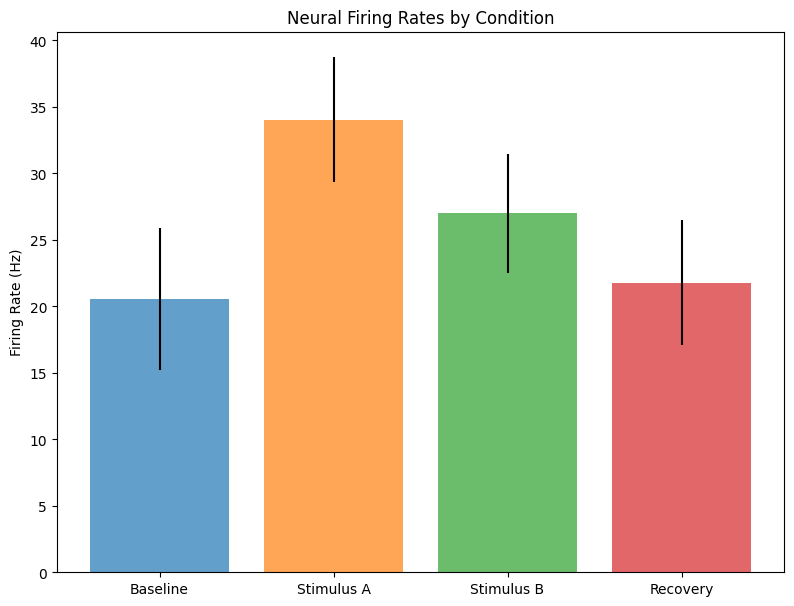

In [2]:
# Simulate neural firing rates across conditions
conditions = {
    'Baseline': np.random.randn(30) * 5 + 20,
    'Stimulus A': np.random.randn(30) * 5 + 35,
    'Stimulus B': np.random.randn(30) * 5 + 28,
    'Recovery': np.random.randn(30) * 5 + 22,
}

# Create bar plot with matplotlib
fig = plot_bar(
    conditions,
    config=PlotConfig(
        title="Neural Firing Rates by Condition",
        ylabel="Firing Rate (Hz)",
        figsize=(8, 6)
    ),
    orientation='v',
    backend='matplotlib'
)
print("✓ Matplotlib bar plot created")

# Create interactive version with plotly
fig = plot_bar(
    conditions,
    config=PlotConfig(
        title="Neural Firing Rates by Condition (Interactive)",
        ylabel="Firing Rate (Hz)",
        figsize=(8, 6)
    ),
    orientation='v',
    backend='plotly'
)
fig.show()
print("✓ Plotly bar plot created")

## 2. Enhanced Violin Plots with `plot_violin()`

Violin plots show full distributions. Our enhanced version includes:
- **Box plot** on the left side for quartile information
- **Individual data points** for transparency
- **Mean line** to show central tendency

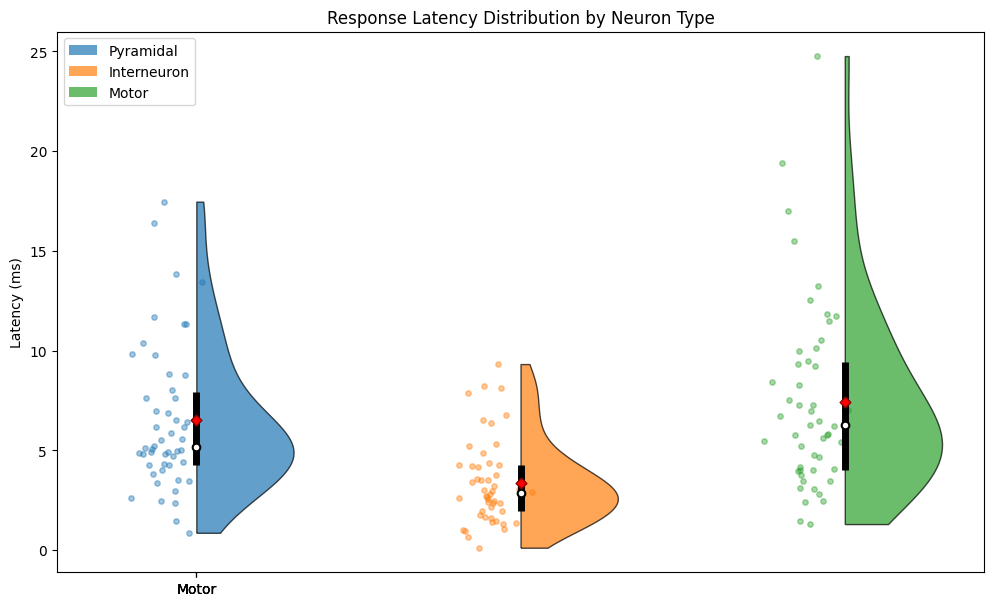

✓ Enhanced matplotlib violin plot created (with box + points)


✓ Enhanced plotly violin plot created


In [3]:
# Simulate response latencies across different neuron types
neuron_types = {
    'Pyramidal': np.random.gamma(3, 2, 50),
    'Interneuron': np.random.gamma(2, 1.5, 50),
    'Motor': np.random.gamma(4, 1.8, 50),
}

# Enhanced violin plot with matplotlib (includes box + points)
fig = plot_violin(
    neuron_types,
    config=PlotConfig(
        title="Response Latency Distribution by Neuron Type",
        ylabel="Latency (ms)",
        figsize=(10, 6)
    ),
    showmeans=True,
    showmedians=True,
    showbox=True,  # Show box plot on left side
    showpoints=True,  # Show individual points
    backend='matplotlib'
)
plt.show()
print("✓ Enhanced matplotlib violin plot created (with box + points)")

# Interactive version with plotly
fig = plot_violin(
    neuron_types,
    config=PlotConfig(
        title="Response Latency Distribution by Neuron Type (Interactive)",
        ylabel="Latency (ms)",
        figsize=(10, 6)
    ),
    showmeans=True,
    showbox=True,
    showpoints=True,
    backend='plotly'
)
fig.show()
print("✓ Enhanced plotly violin plot created")

## 3. Box Plots with `plot_box()`

Box plots provide a concise summary of distributions showing quartiles and outliers.

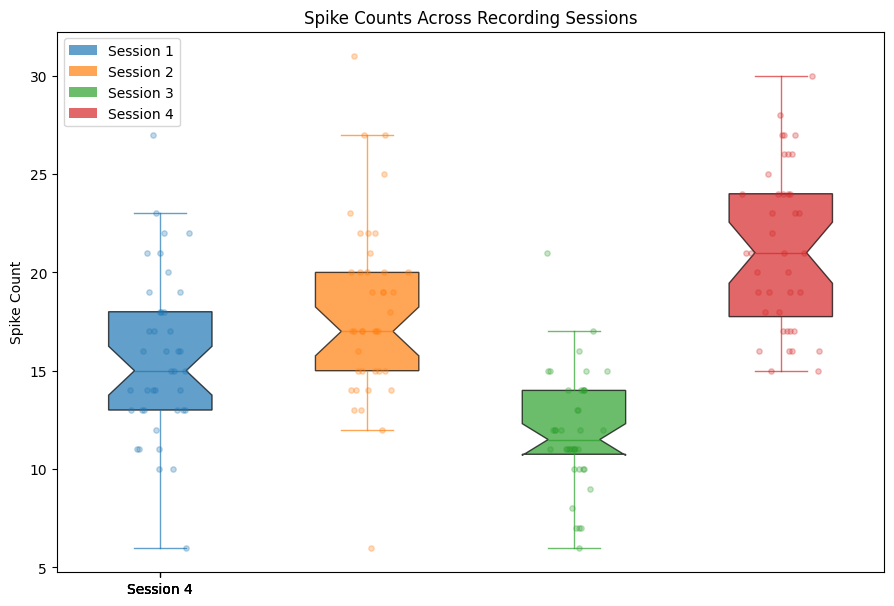

✓ Matplotlib box plot created


✓ Plotly box plot created


In [4]:
# Simulate spike counts across different recording sessions
sessions = {
    'Session 1': np.random.poisson(15, 40),
    'Session 2': np.random.poisson(18, 40),
    'Session 3': np.random.poisson(12, 40),
    'Session 4': np.random.poisson(20, 40),
}

# Box plot with matplotlib
fig = plot_box(
    sessions,
    config=PlotConfig(
        title="Spike Counts Across Recording Sessions",
        ylabel="Spike Count",
        figsize=(9, 6)
    ),
    notch=True,  # Notched box plot for confidence intervals
    backend='matplotlib'
)
plt.show()
print("✓ Matplotlib box plot created")

# Interactive version with plotly
fig = plot_box(
    sessions,
    config=PlotConfig(
        title="Spike Counts Across Recording Sessions (Interactive)",
        ylabel="Spike Count",
        figsize=(9, 6)
    ),
    notch=True,
    backend='plotly'
)
fig.show()
print("✓ Plotly box plot created")

## 4. Grouped Distributions with `plot_grouped_distributions()`

Compare distributions across multiple groups and conditions using a nested dictionary structure.

In [5]:
# Simulate neural activity for different brain regions and conditions
data_grouped = {
    'Visual Cortex': {
        'Light ON': np.random.randn(50) * 8 + 45,
        'Light OFF': np.random.randn(50) * 8 + 25,
    },
    'Motor Cortex': {
        'Light ON': np.random.randn(50) * 6 + 30,
        'Light OFF': np.random.randn(50) * 6 + 28,
    },
    'Prefrontal Cortex': {
        'Light ON': np.random.randn(50) * 7 + 40,
        'Light OFF': np.random.randn(50) * 7 + 35,
    },
}

# Violin plots for grouped comparison
fig = plot_grouped_distributions(
    data_grouped,
    plot_type='violin',
    config=PlotConfig(
        title="Neural Activity Across Brain Regions and Light Conditions",
        ylabel="Activity (Hz)",
        figsize=(12, 6)
    ),
    showmeans=True,
    showbox=True,
    backend='plotly'
)
fig.show()
print("✓ Grouped distributions plot created (violin)")

# Box plots for grouped comparison
fig = plot_grouped_distributions(
    data_grouped,
    plot_type='box',
    config=PlotConfig(
        title="Neural Activity Across Brain Regions and Light Conditions (Box Plot)",
        ylabel="Activity (Hz)",
        figsize=(12, 6)
    ),
    backend='plotly'
)
fig.show()
print("✓ Grouped distributions plot created (box)")

✓ Grouped distributions plot created (violin)


✓ Grouped distributions plot created (box)


## 5. Comparison Grid with `plot_comparison_distributions()`

Create side-by-side comparisons of distributions across multiple conditions in a grid layout.

In [6]:
# Simulate trial-by-trial variability for different experimental conditions
trial_data = {
    'Pre-Training': {
        'Correct': np.random.beta(2, 5, 60) * 100,
        'Incorrect': np.random.beta(5, 2, 60) * 100,
    },
    'During Training': {
        'Correct': np.random.beta(3, 4, 60) * 100,
        'Incorrect': np.random.beta(4, 3, 60) * 100,
    },
    'Post-Training': {
        'Correct': np.random.beta(5, 2, 60) * 100,
        'Incorrect': np.random.beta(2, 5, 60) * 100,
    },
}

# Create comparison grid with violin plots
fig = plot_comparison_distributions(
    trial_data,
    plot_type='violin',
    rows=1,
    cols=3,
    config=PlotConfig(
        title="Performance Accuracy Across Training Phases",
        ylabel="Accuracy (%)",
        figsize=(14, 5)
    ),
    showmeans=True,
    showbox=True,
    showpoints=True,
    backend='plotly'
)
fig.show()
print("✓ Comparison distributions grid created")

# Alternative: horizontal layout with box plots
fig = plot_comparison_distributions(
    trial_data,
    plot_type='box',
    rows=3,
    cols=1,
    config=PlotConfig(
        title="Performance Accuracy Across Training Phases (Box Plots)",
        xlabel="Accuracy (%)",
        figsize=(8, 10)
    ),
    backend='plotly'
)
fig.show()
print("✓ Alternative comparison distributions grid created")

✓ Comparison distributions grid created


✓ Alternative comparison distributions grid created


## 6. Advanced Example: Combined Analysis

Demonstrate how to use PlotGrid directly for custom statistical visualizations.

In [7]:
from neural_analysis.plotting import PlotGrid, PlotSpec, GridLayoutConfig

# Generate data for different analysis types
np.random.seed(123)
control_data = np.random.randn(100) * 10 + 50
treatment_data = np.random.randn(100) * 12 + 65

# Create custom grid with multiple plot types
plot_specs = [
    # Violin plots in first row
    PlotSpec(
        data=control_data,
        plot_type='violin',
        subplot_position=0,
        title='Control Distribution',
        label='Control',
        color='blue',
        kwargs={'showbox': True, 'showpoints': True, 'showmeans': True}
    ),
    PlotSpec(
        data=treatment_data,
        plot_type='violin',
        subplot_position=1,
        title='Treatment Distribution',
        label='Treatment',
        color='red',
        kwargs={'showbox': True, 'showpoints': True, 'showmeans': True}
    ),
    
    # Histograms in second row
    PlotSpec(
        data=control_data,
        plot_type='histogram',
        subplot_position=2,
        title='Control Histogram',
        label='Control',
        color='blue',
        alpha=0.6,
        kwargs={'bins': 30}
    ),
    PlotSpec(
        data=treatment_data,
        plot_type='histogram',
        subplot_position=3,
        title='Treatment Histogram',
        label='Treatment',
        color='red',
        alpha=0.6,
        kwargs={'bins': 30}
    ),
]

# Create grid
grid = PlotGrid(
    plot_specs=plot_specs,
    layout=GridLayoutConfig(rows=2, cols=2),
    config=PlotConfig(
        title="Comprehensive Statistical Analysis: Control vs Treatment",
        figsize=(12, 10)
    ),
    backend='plotly'
)

fig = grid.plot()
fig.show()

print("\n" + "="*70)
print("✓ Custom PlotGrid created with mixed plot types!")
print("="*70)
print("\nKey Takeaway: All statistical plotting should use PlotGrid for:")
print("  • Consistent styling across all visualizations")
print("  • Easy multi-panel layouts")
print("  • Flexible backend switching (matplotlib ↔ plotly)")
print("  • Legend deduplication and proper formatting")
print("  • Metadata-driven approach for reproducibility")


✓ Custom PlotGrid created with mixed plot types!

Key Takeaway: All statistical plotting should use PlotGrid for:
  • Consistent styling across all visualizations
  • Easy multi-panel layouts
  • Flexible backend switching (matplotlib ↔ plotly)
  • Legend deduplication and proper formatting
  • Metadata-driven approach for reproducibility


## Summary

### Statistical Plotting Functions

| Function | Use Case | Key Features |
|----------|----------|-------------|
| `plot_bar()` | Group comparisons with means | Error bars, horizontal/vertical |
| `plot_violin()` | Full distribution shape | **Enhanced**: box plot + individual points |
| `plot_box()` | Quartile summaries | Notched option for confidence |
| `plot_grouped_distributions()` | Multi-group nested comparisons | Supports nested dict structure |
| `plot_comparison_distributions()` | Side-by-side distribution grids | Flexible grid layouts |

### Best Practices

1. **Always use PlotGrid**: All functions internally use PlotGrid for consistency
2. **Enhanced violin plots**: Use `showbox=True` and `showpoints=True` for maximum information
3. **Backend flexibility**: Switch between `matplotlib` (static) and `plotly` (interactive)
4. **Type safety**: All functions use `Literal` type hints for plot_type and backend
5. **Modular design**: Plotting logic is extracted into renderer functions for reusability

### Next Steps

- See `plotting_grid_showcase.ipynb` for comprehensive PlotGrid examples
- See `metrics_examples.ipynb` for real-world neural data analysis
- Check documentation in `docs/` for detailed API reference